In [1]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = 'individual+household+electric+power+consumption.zip'
extract_folder_path = 'household_power_consumption'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the files extracted
extracted_files = os.listdir(extract_folder_path)
extracted_files

['household_power_consumption.txt']

In [2]:
import pandas as pd

# File path of the extracted data
data_file_path = os.path.join(extract_folder_path, 'household_power_consumption.txt')

# Loading a portion of the data to understand its structure
# Assuming the file is in a format readable by pandas, such as CSV or similar.
sample_data = pd.read_csv(data_file_path, sep=';')

sample_data.info()
sample_data.head()

<ipython-input-2-9cfacf651764>:8: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_data = pd.read_csv(data_file_path, sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Data preprocessing steps

# Parsing Date and Time columns into a single datetime column
sample_data['Datetime'] = pd.to_datetime(sample_data['Date'] + ' ' + sample_data['Time'])

# Dropping the original Date and Time columns as they are now redundant
sample_data.drop(['Date', 'Time'], axis=1, inplace=True)

# Reordering columns to have Datetime first
sample_data = sample_data[['Datetime'] + [col for col in sample_data.columns if col != 'Datetime']]

# Checking for missing values
missing_values = sample_data.isnull().sum()

# Displaying the updated dataframe and missing values information
sample_data.head(), missing_values

(             Datetime Global_active_power Global_reactive_power  Voltage  \
 0 2006-12-16 17:24:00               4.216                 0.418  234.840   
 1 2006-12-16 17:25:00               5.360                 0.436  233.630   
 2 2006-12-16 17:26:00               5.374                 0.498  233.290   
 3 2006-12-16 17:27:00               5.388                 0.502  233.740   
 4 2006-12-16 17:28:00               3.666                 0.528  235.680   
 
   Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
 0           18.400          0.000          1.000            17.0  
 1           23.000          0.000          1.000            16.0  
 2           23.000          0.000          2.000            17.0  
 3           23.000          0.000          1.000            17.0  
 4           15.800          0.000          1.000            17.0  ,
 Datetime                     0
 Global_active_power          0
 Global_reactive_power        0
 Voltage                      0

In [4]:
# Loading the entire dataset for comprehensive data cleaning and checking for missing values
# Given the potential size of the dataset, we will load it in chunks to avoid memory issues

# Initialize an empty dataframe to accumulate the chunk-wise analysis results
missing_values_summary = pd.DataFrame()

# Define chunk size
chunksize = 10000

# Processing the dataset in chunks
for chunk in pd.read_csv(data_file_path, sep=';', chunksize=chunksize):
    # Parsing Date and Time columns into a single datetime column for each chunk
    chunk['Datetime'] = pd.to_datetime(chunk['Date'] + ' ' + chunk['Time'], errors='coerce')
    chunk.drop(['Date', 'Time'], axis=1, inplace=True)

    # Checking for missing values in the current chunk
    missing_values = chunk.isnull().sum()
    missing_values['Chunk'] = f"Chunk {len(missing_values_summary) + 1}"
    missing_values_summary = missing_values_summary.append(missing_values, ignore_index=True)


<ipython-input-4-bebd5261eb70>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_summary = missing_values_summary.append(missing_values, ignore_index=True)
<ipython-input-4-bebd5261eb70>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_summary = missing_values_summary.append(missing_values, ignore_index=True)
<ipython-input-4-bebd5261eb70>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_summary = missing_values_summary.append(missing_values, ignore_index=True)
<ipython-input-4-bebd5261eb70>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_summary = missing_values_summary.ap

In [5]:
# Optimizing the process to check for missing values in the dataset

# Initialize variables to accumulate missing values information
total_missing_values = pd.Series(dtype=int)

# Processing the dataset in chunks with optimized operations
for chunk in pd.read_csv(data_file_path, sep=';', chunksize=chunksize):
    # Handling potential parsing errors in datetime conversion
    chunk['Datetime'] = pd.to_datetime(chunk['Date'] + ' ' + chunk['Time'], errors='coerce')
    chunk.drop(['Date', 'Time'], axis=1, inplace=True)

    # Accumulate the count of missing values
    total_missing_values = total_missing_values.add(chunk.isnull().sum(), fill_value=0)

total_missing_values

Global_active_power          0.0
Global_reactive_power        0.0
Voltage                      0.0
Global_intensity             0.0
Sub_metering_1               0.0
Sub_metering_2               0.0
Sub_metering_3           25979.0
Datetime                     0.0
dtype: float64

In [6]:
# Loading a representative sample of the data for exploratory analysis
# Given the size of the dataset, a sample size of 100,000 rows will be used for this purpose

sample_size = 100000
data_sample = pd.read_csv(data_file_path, sep=';', nrows=sample_size)

# Parsing Date and Time columns into a single datetime column for the sample
data_sample['Datetime'] = pd.to_datetime(data_sample['Date'] + ' ' + data_sample['Time'], errors='coerce')
data_sample.drop(['Date', 'Time'], axis=1, inplace=True)

# Checking for missing values in the sample
missing_values_sample = data_sample.isnull().sum()

# Displaying the first few rows of the sample and missing values information
data_sample.head(), missing_values_sample

(  Global_active_power Global_reactive_power  Voltage Global_intensity  \
 0               4.216                 0.418  234.840           18.400   
 1               5.360                 0.436  233.630           23.000   
 2               5.374                 0.498  233.290           23.000   
 3               5.388                 0.502  233.740           23.000   
 4               3.666                 0.528  235.680           15.800   
 
   Sub_metering_1 Sub_metering_2  Sub_metering_3            Datetime  
 0          0.000          1.000            17.0 2006-12-16 17:24:00  
 1          0.000          1.000            16.0 2006-12-16 17:25:00  
 2          0.000          2.000            17.0 2006-12-16 17:26:00  
 3          0.000          1.000            17.0 2006-12-16 17:27:00  
 4          0.000          1.000            17.0 2006-12-16 17:28:00  ,
 Global_active_power      0
 Global_reactive_power    0
 Voltage                  0
 Global_intensity         0
 Sub_metering_1

In [12]:
data_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Handling missing values: Simple imputation with median (robust to outliers)
data_sample['Sub_metering_3'].fillna(data_sample['Sub_metering_3'].median(), inplace=True)

In [15]:
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


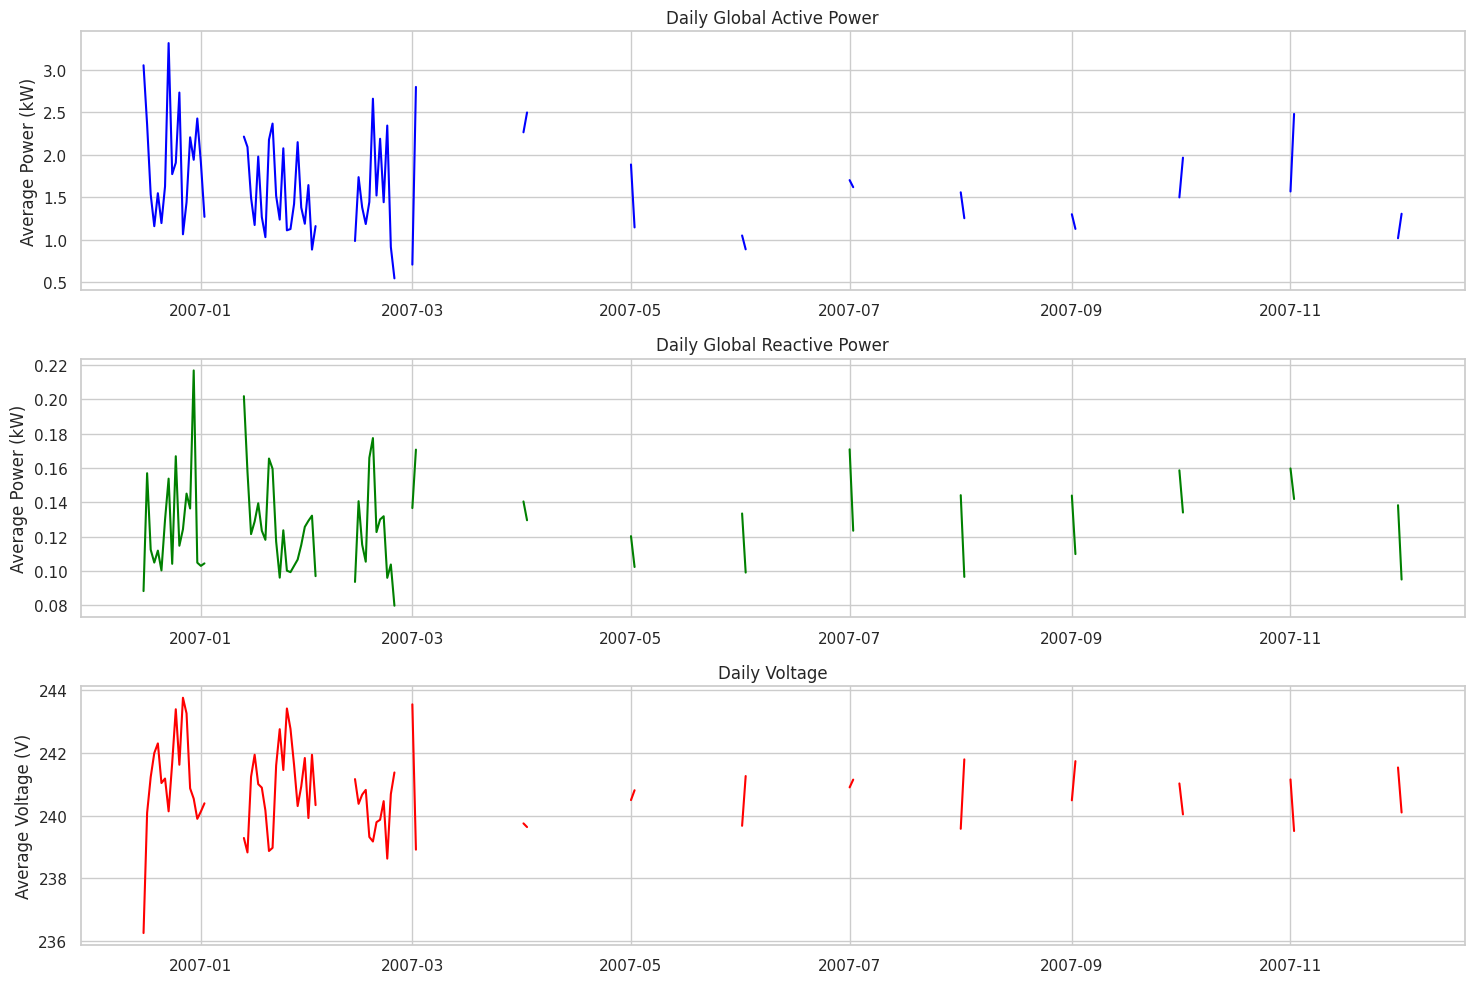

In [20]:
# Checking data types of the columns
data_sample.dtypes

# Converting numerical columns to appropriate data types
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data_sample[numerical_columns] = data_sample[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Rechecking data types after conversion
data_sample.dtypes

# Reattempting resampling and trend analysis
daily_data = data_sample.resample('D', on='Datetime').mean()

# Plotting trends in key metrics again
plt.figure(figsize=(15, 10))

# Global Active Power
plt.subplot(3, 1, 1)
plt.plot(daily_data.index, daily_data['Global_active_power'], color='blue')
plt.title('Daily Global Active Power')
plt.ylabel('Average Power (kW)')

# Global Reactive Power
plt.subplot(3, 1, 2)
plt.plot(daily_data.index, daily_data['Global_reactive_power'], color='green')
plt.title('Daily Global Reactive Power')
plt.ylabel('Average Power (kW)')

# Voltage
plt.subplot(3, 1, 3)
plt.plot(daily_data.index, daily_data['Voltage'], color='red')
plt.title('Daily Voltage')
plt.ylabel('Average Voltage (V)')

plt.tight_layout()
plt.show()

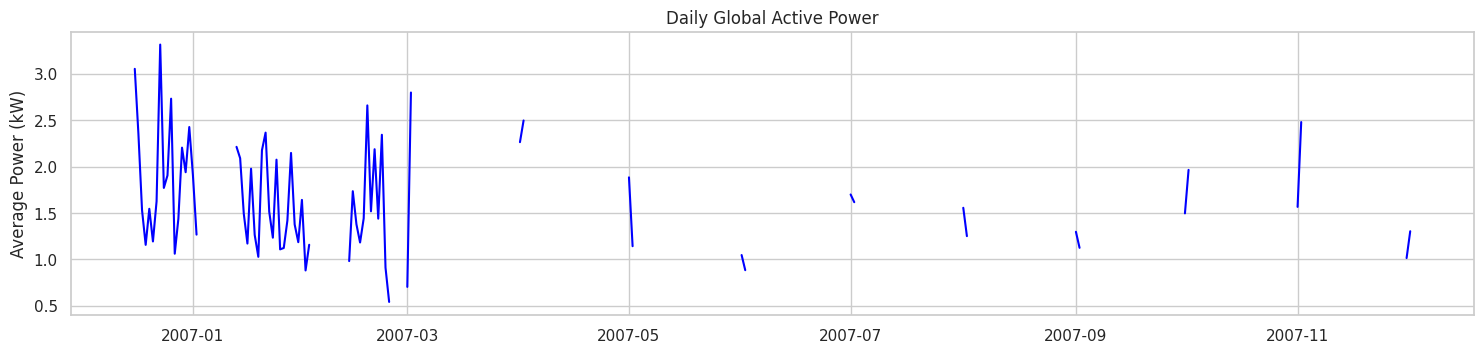

In [21]:
# Plotting trends in key metrics
plt.figure(figsize=(15, 10))

# Global Active Power
plt.subplot(3, 1, 1)
plt.plot(daily_data.index, daily_data['Global_active_power'], color='blue')
plt.title('Daily Global Active Power')
plt.ylabel('Average Power (kW)')
plt.tight_layout()
plt.show()

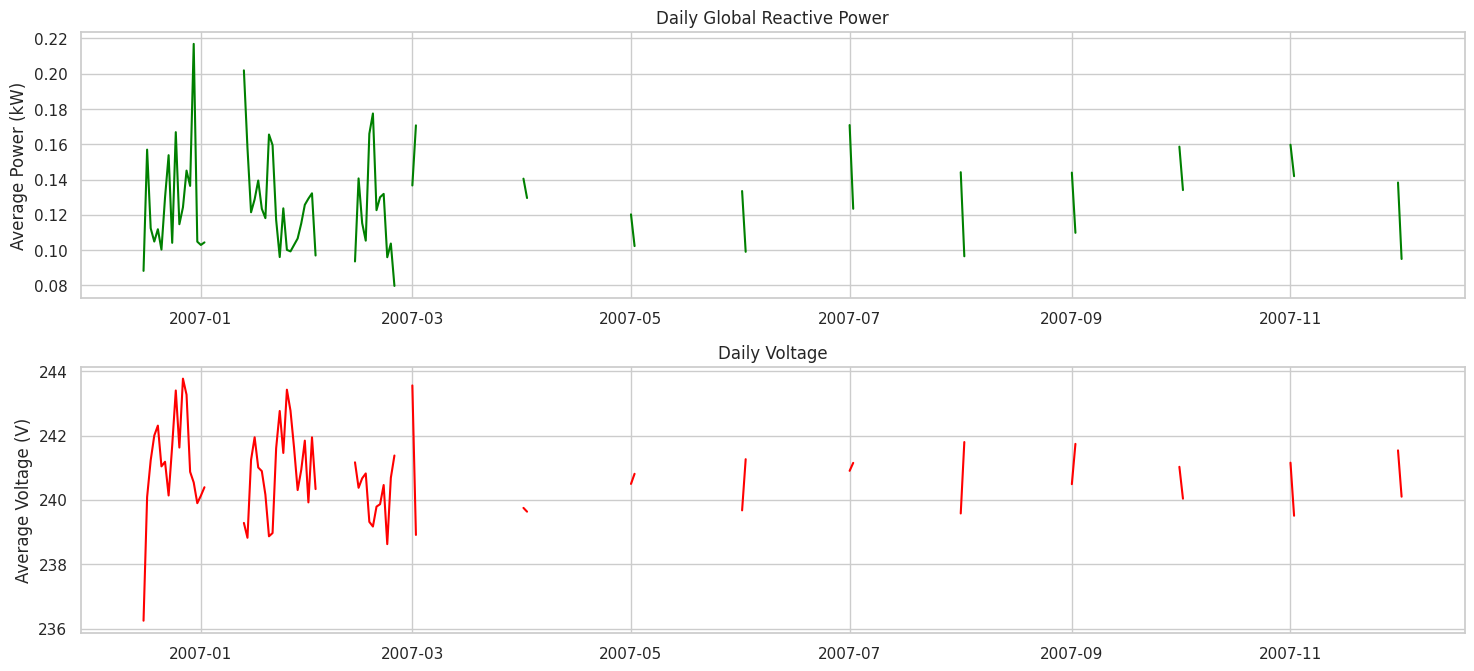

In [22]:
# Global Reactive Power
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 2)
plt.plot(daily_data.index, daily_data['Global_reactive_power'], color='green')
plt.title('Daily Global Reactive Power')
plt.ylabel('Average Power (kW)')

# Voltage
plt.subplot(3, 1, 3)
plt.plot(daily_data.index, daily_data['Voltage'], color='red')
plt.title('Daily Voltage')
plt.ylabel('Average Voltage (V)')

plt.tight_layout()
plt.show()

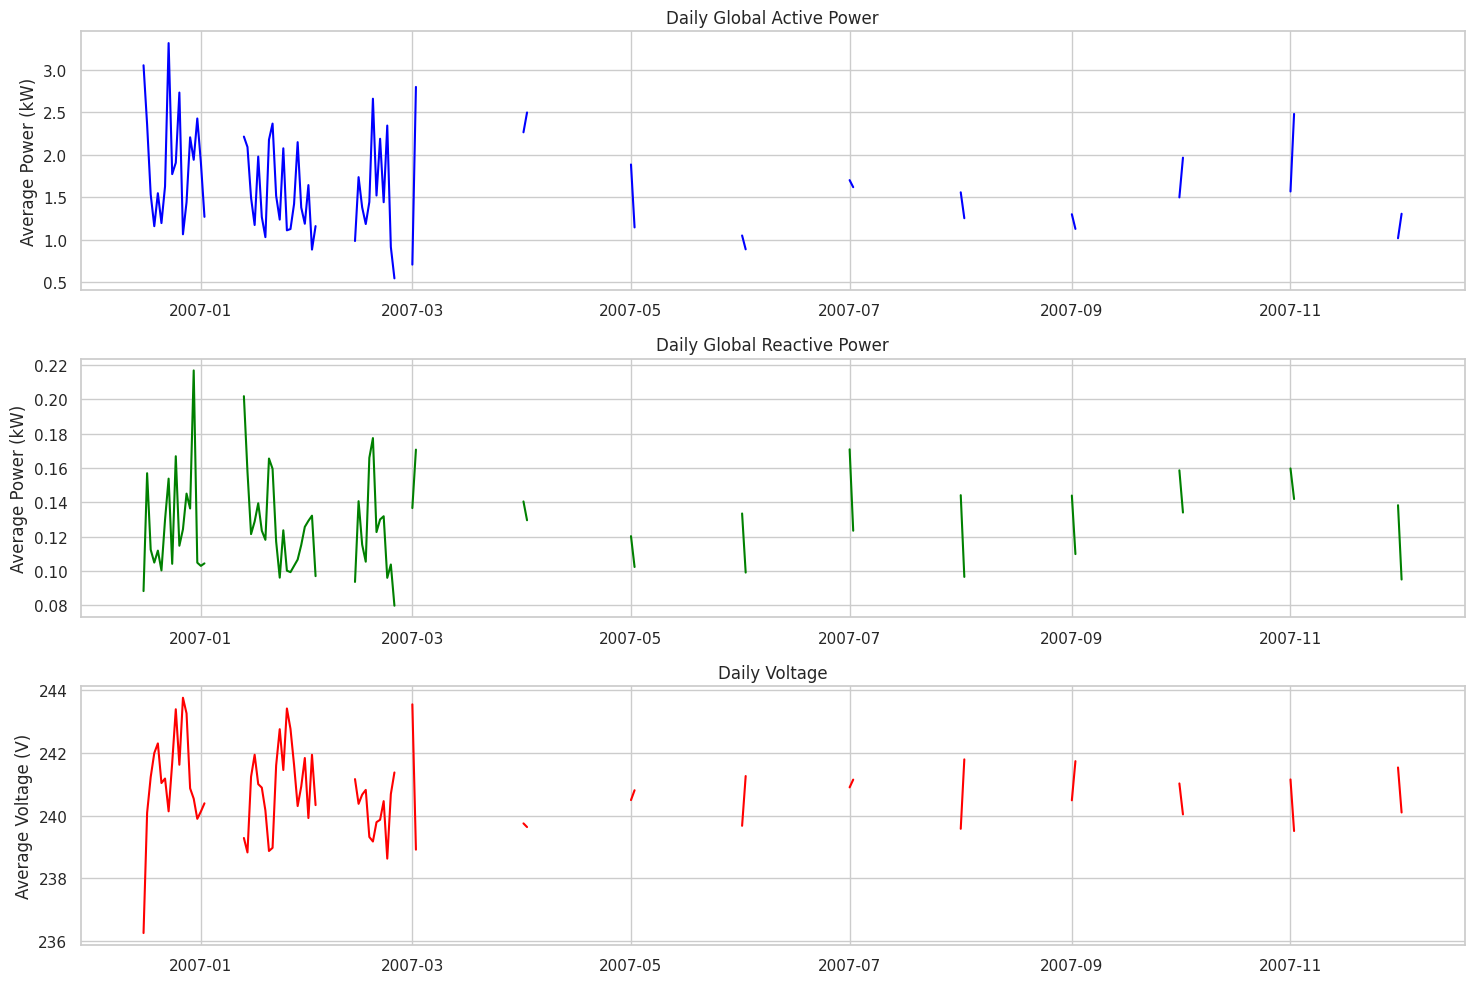

In [23]:
# Checking data types of the columns
data_sample.dtypes

# Converting numerical columns to appropriate data types
numerical_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data_sample[numerical_columns] = data_sample[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Rechecking data types after conversion
data_sample.dtypes

# Reattempting resampling and trend analysis
daily_data = data_sample.resample('D', on='Datetime').mean()

# Plotting trends in key metrics again
plt.figure(figsize=(15, 10))

# Global Active Power
plt.subplot(3, 1, 1)
plt.plot(daily_data.index, daily_data['Global_active_power'], color='blue')
plt.title('Daily Global Active Power')
plt.ylabel('Average Power (kW)')

# Global Reactive Power
plt.subplot(3, 1, 2)
plt.plot(daily_data.index, daily_data['Global_reactive_power'], color='green')
plt.title('Daily Global Reactive Power')
plt.ylabel('Average Power (kW)')

# Voltage
plt.subplot(3, 1, 3)
plt.plot(daily_data.index, daily_data['Voltage'], color='red')
plt.title('Daily Voltage')
plt.ylabel('Average Voltage (V)')

plt.tight_layout()
plt.show()

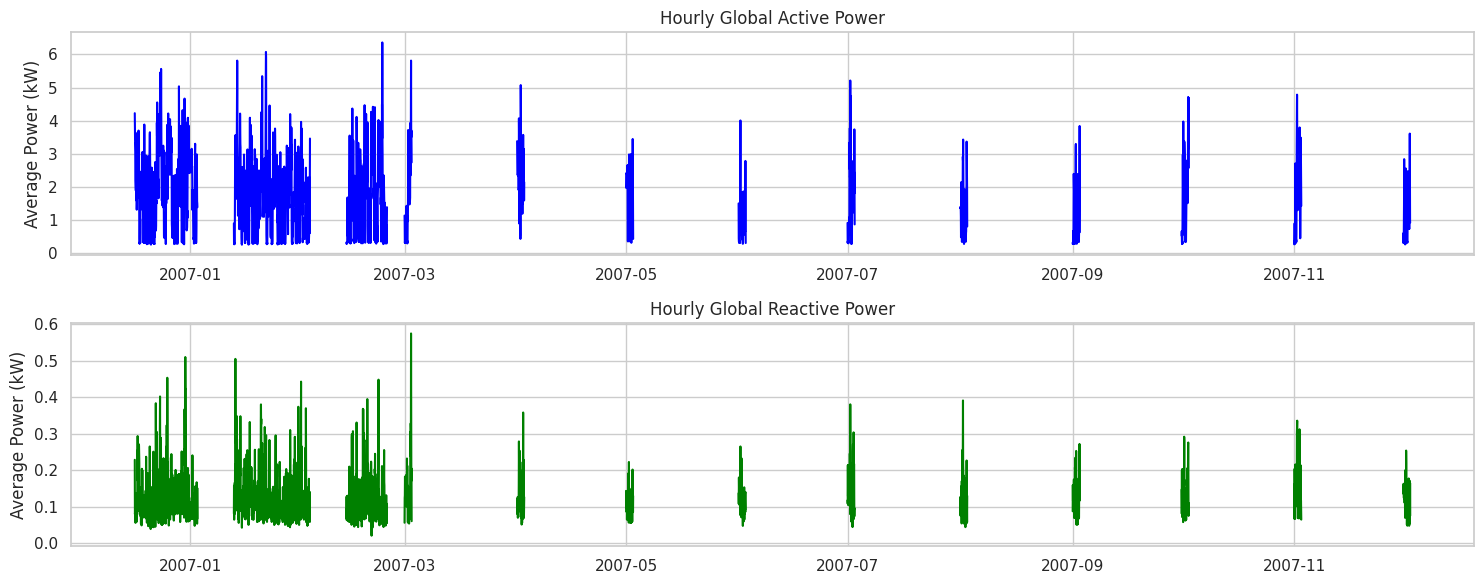

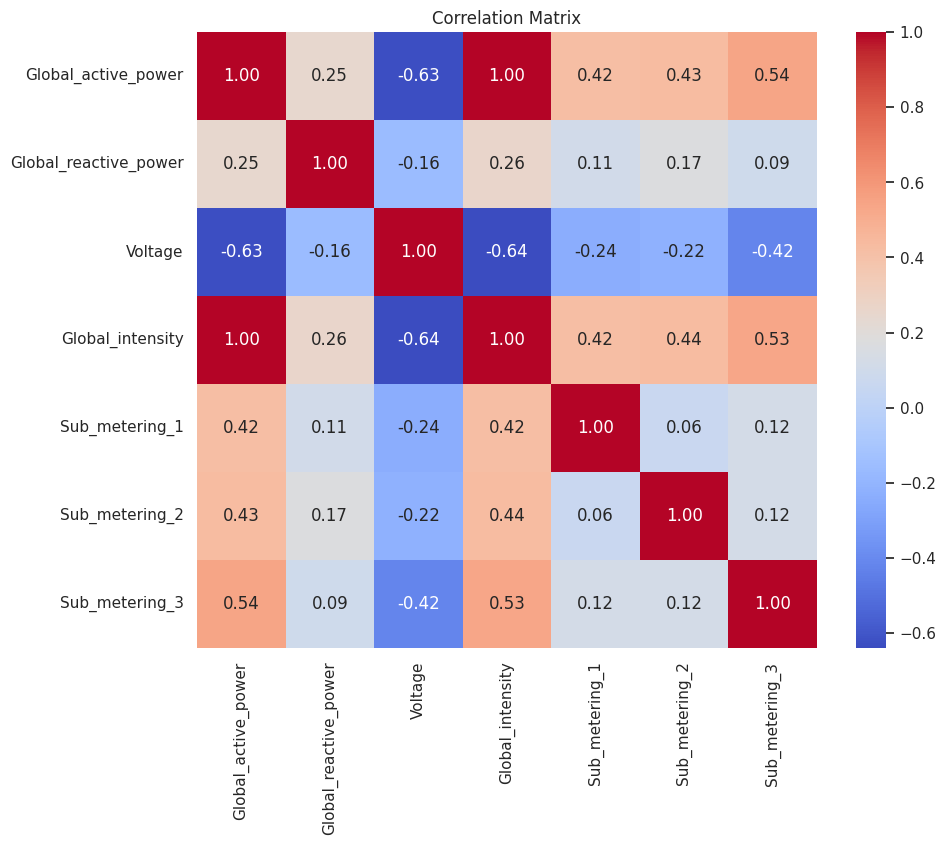

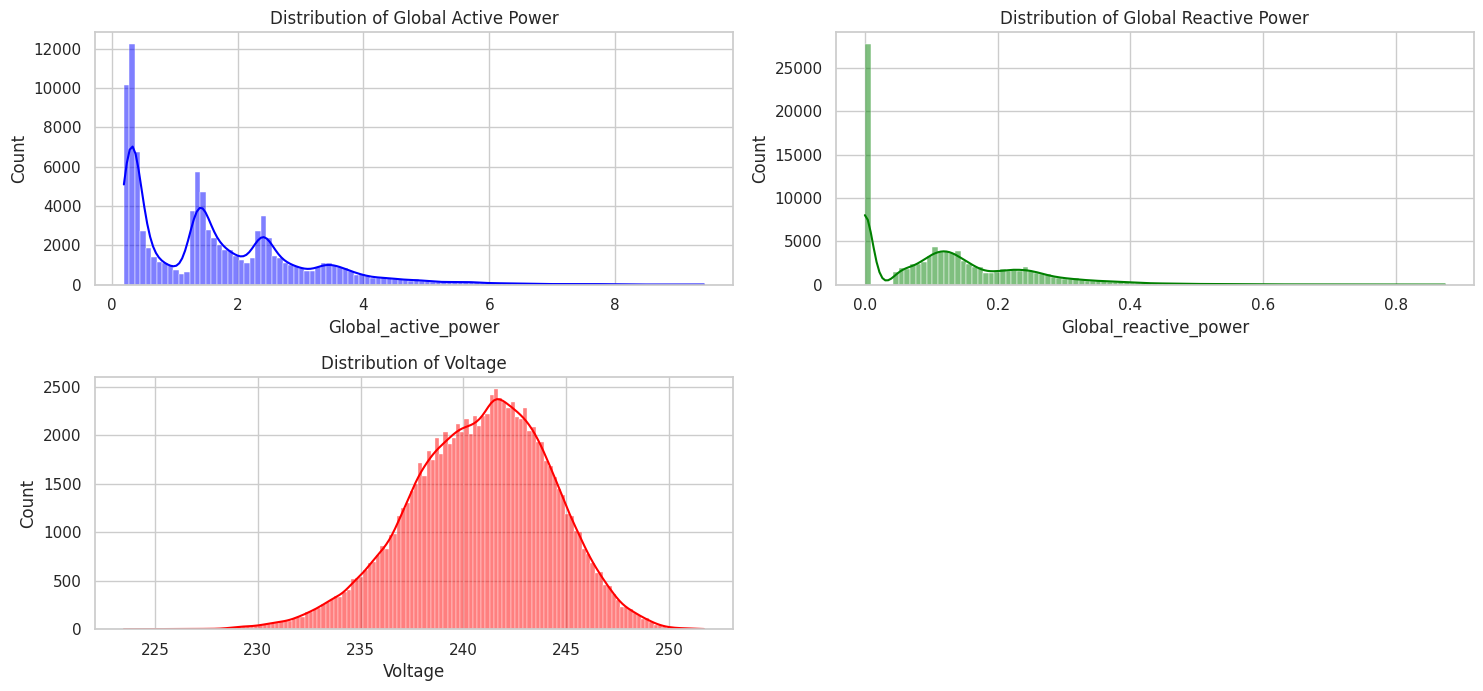

In [24]:
# Additional EDA: Delving Deeper into the Data

# Plotting hourly trends for a more granular view of power consumption
# Resampling data to hourly frequency
hourly_data = data_sample.resample('H', on='Datetime').mean()

# Plotting hourly trends
plt.figure(figsize=(15, 6))

# Global Active Power
plt.subplot(2, 1, 1)
plt.plot(hourly_data.index, hourly_data['Global_active_power'], color='blue')
plt.title('Hourly Global Active Power')
plt.ylabel('Average Power (kW)')

# Global Reactive Power
plt.subplot(2, 1, 2)
plt.plot(hourly_data.index, hourly_data['Global_reactive_power'], color='green')
plt.title('Hourly Global Reactive Power')
plt.ylabel('Average Power (kW)')

plt.tight_layout()
plt.show()

# Correlation Analysis
# Calculating correlations among numerical columns
correlations = data_sample[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pattern Identification: Distribution of key metrics
# Plotting histograms for distribution analysis
plt.figure(figsize=(15, 10))

# Global Active Power Distribution
plt.subplot(3, 2, 1)
sns.histplot(data_sample['Global_active_power'], kde=True, color='blue')
plt.title('Distribution of Global Active Power')

# Global Reactive Power Distribution
plt.subplot(3, 2, 2)
sns.histplot(data_sample['Global_reactive_power'], kde=True, color='green')
plt.title('Distribution of Global Reactive Power')

# Voltage Distribution
plt.subplot(3, 2, 3)
sns.histplot(data_sample['Voltage'], kde=True, color='red')
plt.title('Distribution of Voltage')

plt.tight_layout()
plt.show()

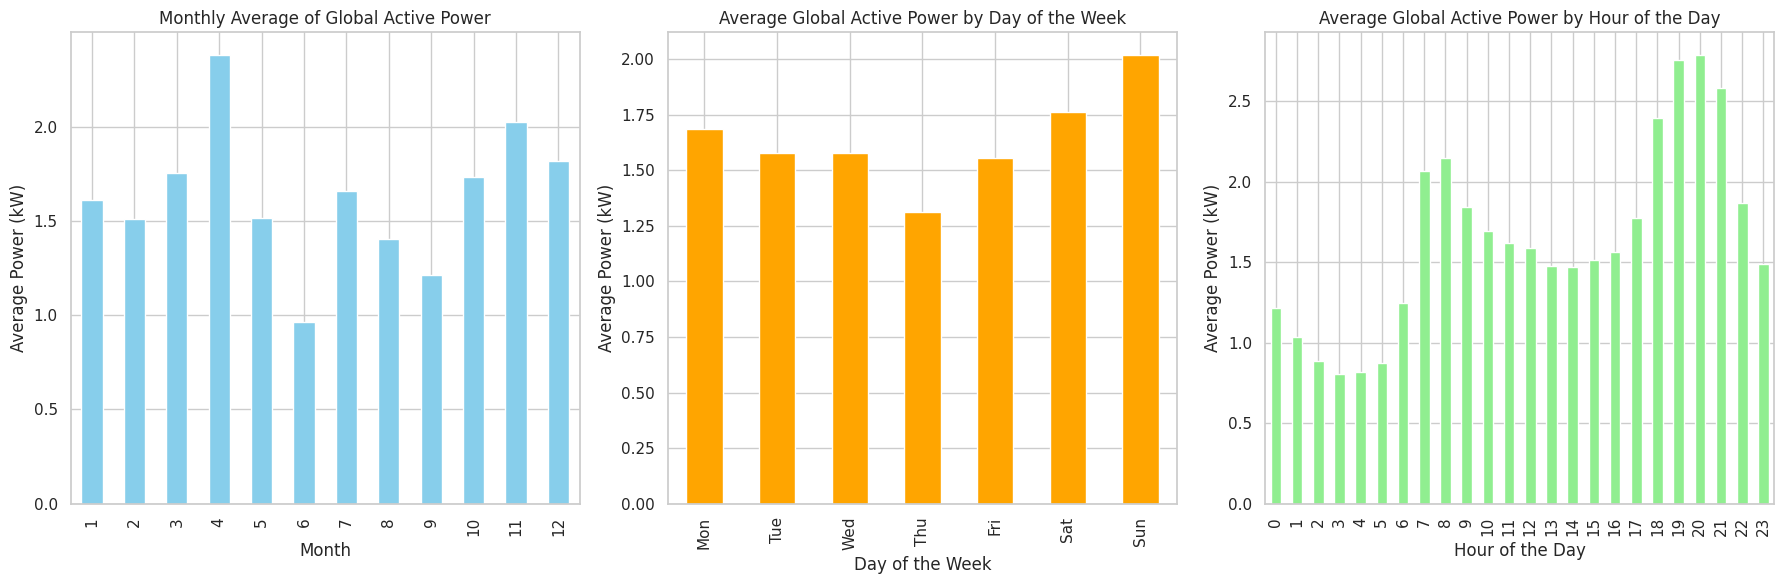

In [25]:
# Further EDA: Exploring Seasonal Patterns and Weekly Trends

# Extracting day of week, month, and hour for more detailed analysis
data_sample['DayOfWeek'] = data_sample['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
data_sample['Month'] = data_sample['Datetime'].dt.month
data_sample['Hour'] = data_sample['Datetime'].dt.hour

# Analyzing Seasonal Patterns: Monthly Average of Global Active Power
monthly_avg_active_power = data_sample.groupby('Month')['Global_active_power'].mean()

# Analyzing Weekly Trends: Average Global Active Power by Day of the Week
weekly_avg_active_power = data_sample.groupby('DayOfWeek')['Global_active_power'].mean()

# Analyzing Daily Cycle: Average Global Active Power by Hour of the Day
hourly_avg_active_power = data_sample.groupby('Hour')['Global_active_power'].mean()

# Plotting Seasonal Patterns, Weekly Trends, and Daily Cycles
plt.figure(figsize=(18, 6))

# Monthly Averages
plt.subplot(1, 3, 1)
monthly_avg_active_power.plot(kind='bar', color='skyblue')
plt.title('Monthly Average of Global Active Power')
plt.xlabel('Month')
plt.ylabel('Average Power (kW)')

# Weekly Averages
plt.subplot(1, 3, 2)
weekly_avg_active_power.plot(kind='bar', color='orange')
plt.title('Average Global Active Power by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Power (kW)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Hourly Averages
plt.subplot(1, 3, 3)
hourly_avg_active_power.plot(kind='bar', color='lightgreen')
plt.title('Average Global Active Power by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power (kW)')

plt.tight_layout()
plt.show()

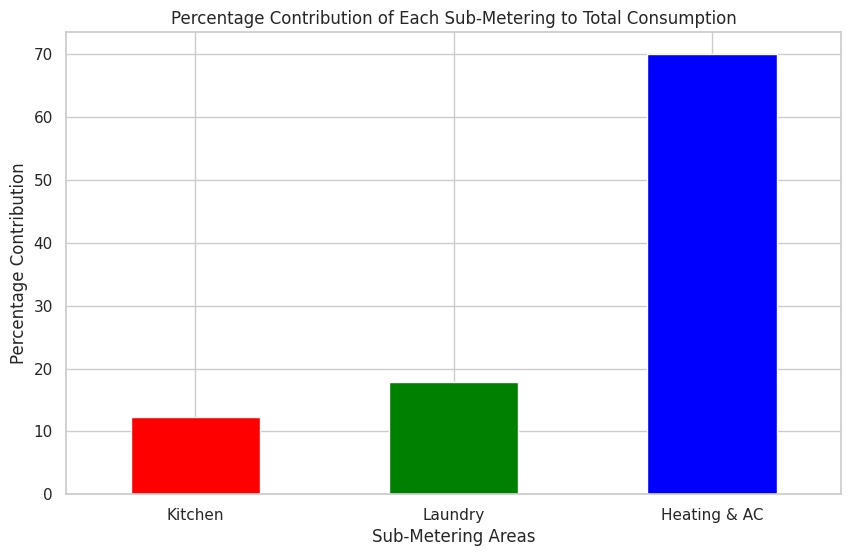

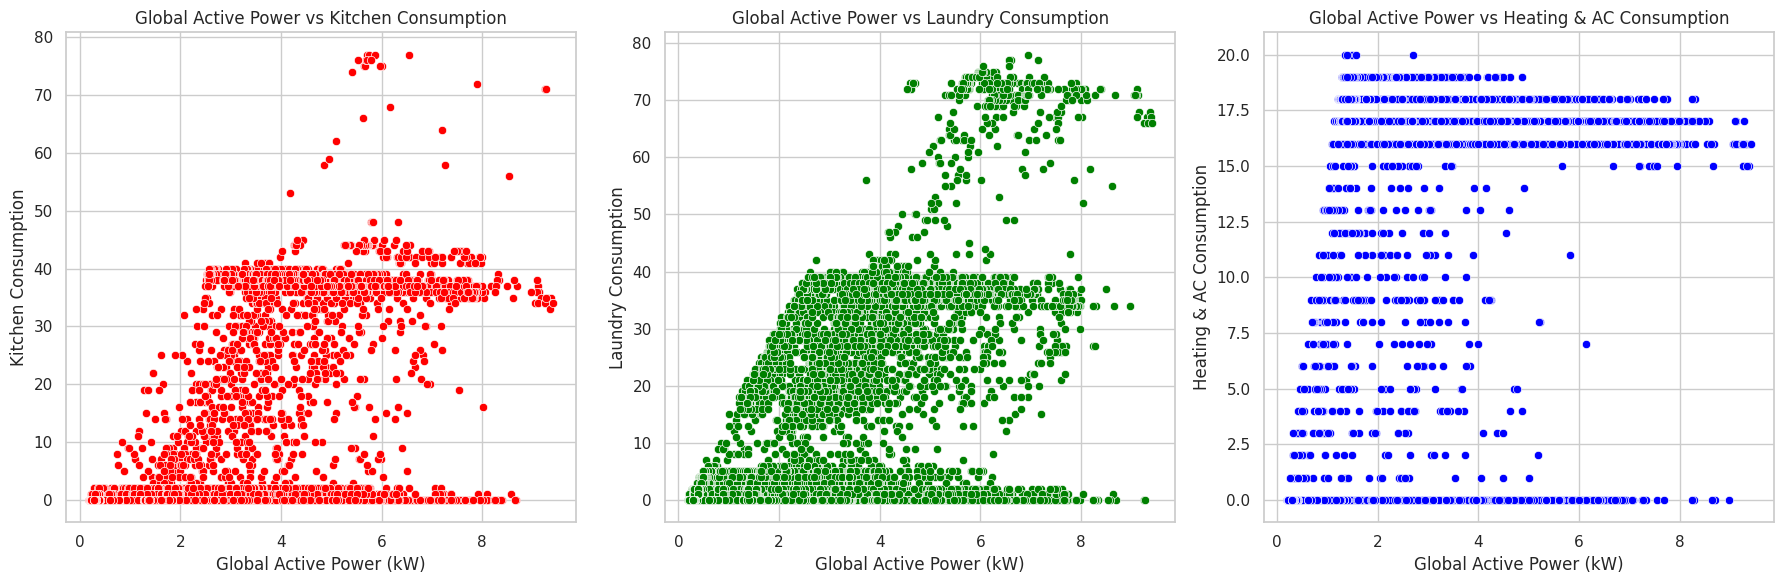

In [26]:
# Further Exploration: Analyzing the Impact of Sub-Metering on Power Consumption

# Sub-metering data provides insights into power consumption in different areas of the household
# Sub_metering_1: Kitchen
# Sub_metering_2: Laundry
# Sub_metering_3: Heating and Air-conditioning

# Aggregating Sub-Metering Data
sub_metering_data = data_sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Analyzing Power Consumption Patterns for Different Household Areas
# Calculating the percentage contribution of each sub-metering to the total
total_sub_metering = sub_metering_data.sum()
sub_metering_percentage = (sub_metering_data / total_sub_metering) * 100

# Plotting Sub-Metering Data
plt.figure(figsize=(10, 6))
sub_metering_percentage.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Percentage Contribution of Each Sub-Metering to Total Consumption')
plt.xlabel('Sub-Metering Areas')
plt.ylabel('Percentage Contribution')
plt.xticks(ticks=range(3), labels=['Kitchen', 'Laundry', 'Heating & AC'], rotation=0)
plt.show()

# Investigating the Relationship between Overall Power Consumption and Sub-Metering
# Scatter plots to visualize these relationships
plt.figure(figsize=(18, 6))

# Global Active Power vs Sub Metering 1 (Kitchen)
plt.subplot(1, 3, 1)
sns.scatterplot(data=data_sample, x='Global_active_power', y='Sub_metering_1', color='red')
plt.title('Global Active Power vs Kitchen Consumption')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Kitchen Consumption')

# Global Active Power vs Sub Metering 2 (Laundry)
plt.subplot(1, 3, 2)
sns.scatterplot(data=data_sample, x='Global_active_power', y='Sub_metering_2', color='green')
plt.title('Global Active Power vs Laundry Consumption')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Laundry Consumption')

# Global Active Power vs Sub Metering 3 (Heating & AC)
plt.subplot(1, 3, 3)
sns.scatterplot(data=data_sample, x='Global_active_power', y='Sub_metering_3', color='blue')
plt.title('Global Active Power vs Heating & AC Consumption')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Heating & AC Consumption')

plt.tight_layout()
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Preparing the time series data
# Using 'Global_active_power' as the target variable for forecasting
time_series = data_sample.set_index('Datetime')['Global_active_power'].resample('D').mean()
time_series.dropna(inplace=True)  # Ensuring no missing values

# Checking for stationarity with Augmented Dickey-Fuller test
adf_test = adfuller(time_series)

# Displaying the results of the stationarity test
adf_test_results = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4]
}

adf_test_results

{'ADF Statistic': -7.337685762488039,
 'p-value': 1.0856585792637372e-10,
 'Critical Values': {'1%': -3.5274258688046647,
  '5%': -2.903810816326531,
  '10%': -2.5893204081632653}}

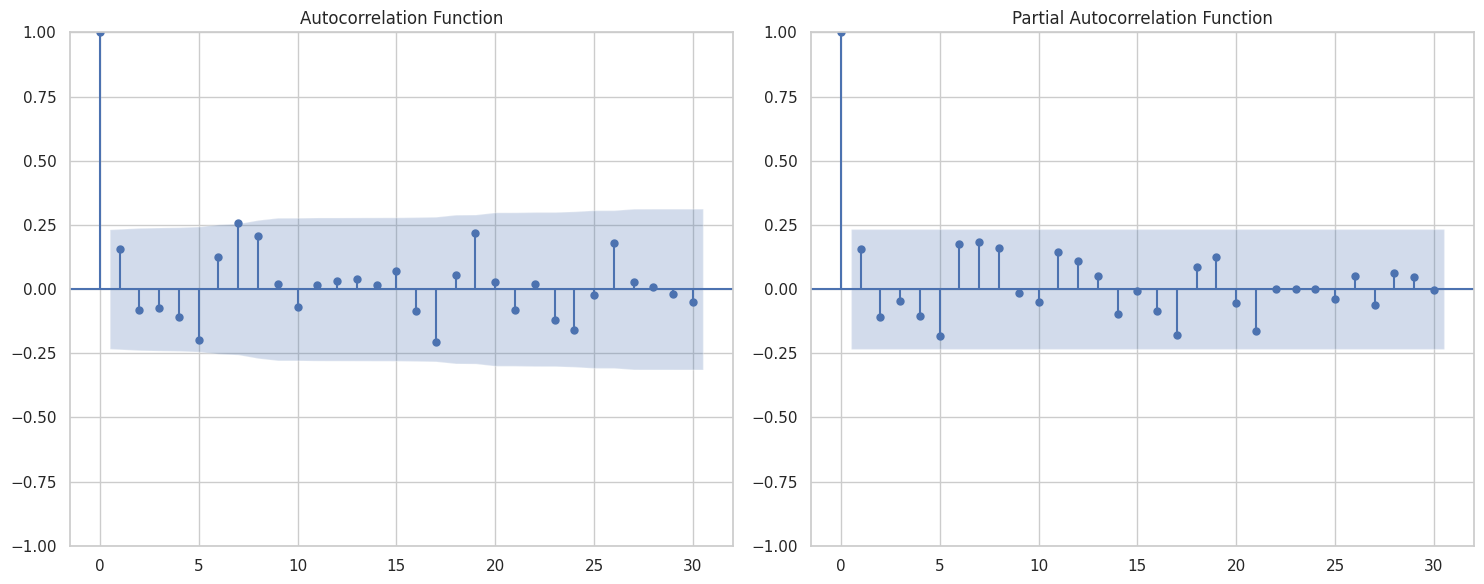

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(15, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(time_series, ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(time_series, ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Defining initial parameters for the ARIMA model
p, d, q = 1, 0, 1  # Initial guess based on ACF and PACF plots

# Splitting the data into train and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]

# Fitting the ARIMA model
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Evaluating the model
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Model performance
rmse, model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

(0.4860239094580863,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                 SARIMAX Results                                
 Dep. Variable:     Global_active_power   No. Observations:                   56
 Model:                  ARIMA(1, 0, 1)   Log Likelihood                 -50.698
 Date:                 Fri, 08 Dec 2023   AIC                            109.395
 Time:                         16:59:43   BIC                            117.497
 Sample:                              0   HQIC                           112.536
                                   - 56                                         
 Covariance Type:                   opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          1.7090      0.103     16.611      0.000       1.507       1.911
 ar.L1         -0.1831      0.670     -0.

In [35]:
from itertools import product

# Defining parameter ranges for tuning
p_range = range(0, 3)  # AR terms
d_range = range(0, 2)  # Differencing
q_range = range(0, 3)  # MA terms

# Creating a grid of parameters
parameter_grid = list(product(p_range, d_range, q_range))

# Initializing a dictionary to store RMSE values for different parameter combinations
rmse_values = {}

# Grid search for parameter tuning
for parameters in parameter_grid:
    try:
        # Fitting ARIMA model with current set of parameters
        model = ARIMA(train, order=parameters)
        model_fit = model.fit()

        # Forecasting and evaluating the model
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)

        # Storing the RMSE value for the current parameter combination
        rmse_values[parameters] = rmse
    except:
        continue  # Skip combinations that result in errors

# Identifying the best parameter combination
best_parameters = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_parameters]

best_parameters, best_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

((2, 0, 1), 0.4611017319781657)

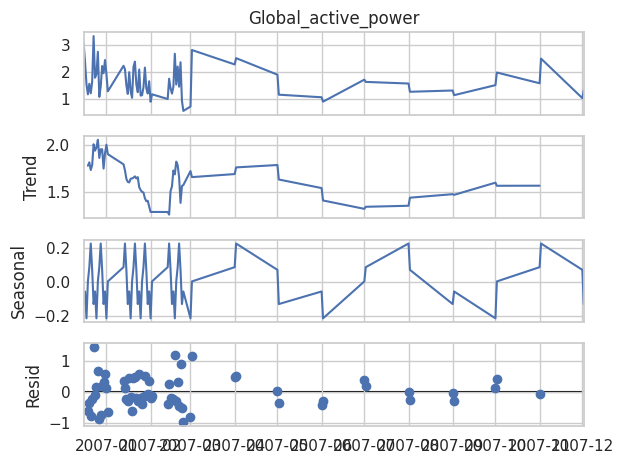

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing seasonal decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Assuming weekly seasonality

# Plotting the seasonal decomposition
decomposition.plot()
plt.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Selecting initial parameters for SARIMA based on the seasonal decomposition
# Assuming a weekly seasonality (S = 7)
P, D, Q, S = 1, 1, 1, 7  # These are initial guesses and may require tuning

# Fitting the SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_model_fit = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Evaluating the model
sarima_mse = mean_squared_error(test, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)

# Model performance
sarima_rmse, sarima_model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(0.39323951898393184,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                     
 Dep. Variable:               Global_active_power   No. Observations:                   56
 Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                 -51.373
 Date:                           Fri, 08 Dec 2023   AIC                            112.746
 Time:                                   16:59:56   BIC                            122.205
 Sample:                                        0   HQIC                           116.335
                                             - 56                                         
 Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.3858      4.364     -0

In [38]:
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm

# Defining a range of parameters for tuning
P_range = range(0, 2)  # Seasonal AR order
D_range = range(0, 2)  # Seasonal differencing order
Q_range = range(0, 2)  # Seasonal MA order
S_range = [7]  # Seasonal period, weekly seasonality assumed

# Grid search for SARIMA parameter tuning
best_rmse = float("inf")
best_cfg = None

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=3)

for P, D, Q, S in tqdm(product(P_range, D_range, Q_range, S_range), total=8):
    rmses = []
    for train_index, test_index in tscv.split(time_series):
        cv_train, cv_test = time_series.iloc[train_index], time_series.iloc[test_index]
        try:
            model = SARIMAX(cv_train, order=(p, d, q), seasonal_order=(P, D, Q, S))
            model_fit = model.fit(disp=False)
            forecast = model_fit.forecast(steps=len(cv_test))
            rmse = np.sqrt(mean_squared_error(cv_test, forecast))
            rmses.append(rmse)
        except:
            break
    if rmses and np.mean(rmses) < best_rmse:
        best_rmse = np.mean(rmses)
        best_cfg = (P, D, Q, S)

best_cfg, best_rmse

  0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

((0, 0, 1, 7), 0.5433965028875597)

In [39]:
# Re-fitting the SARIMA model with the best parameters
best_sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=best_cfg)
best_sarima_model_fit = best_sarima_model.fit()

# Time Series Cross-Validation for Model Validation
validation_rmses = []
for train_index, test_index in TimeSeriesSplit(n_splits=3).split(time_series):
    cv_train, cv_test = time_series.iloc[train_index], time_series.iloc[test_index]
    model = SARIMAX(cv_train, order=(p, d, q), seasonal_order=best_cfg)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=len(cv_test))
    rmse = np.sqrt(mean_squared_error(cv_test, forecast))
    validation_rmses.append(rmse)

# Average RMSE across the cross-validation splits
average_cv_rmse = np.mean(validation_rmses)

# Forecasting future values using the best model
future_forecast = best_sarima_model_fit.forecast(steps=30)  # Forecasting the next 30 days

average_cv_rmse, future_forecast.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(0.5433965028875597,
 71    1.473805
 72    1.577749
 73    1.686498
 74    1.575631
 75    1.825196
 Name: predicted_mean, dtype: float64)

In [40]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Data Preprocessing for LSTM

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Function to create a dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Creating the dataset for LSTM
look_back = 1
X, Y = create_dataset(scaled_data, look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping for efficient training
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Training the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_test, Y_test), callbacks=[early_stop])

# Evaluating the model
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)

train_score, test_score

Epoch 1/100
55/55 - 4s - loss: 0.1413 - val_loss: 0.0362 - 4s/epoch - 68ms/step
Epoch 2/100
55/55 - 0s - loss: 0.0587 - val_loss: 0.0241 - 231ms/epoch - 4ms/step
Epoch 3/100
55/55 - 0s - loss: 0.0458 - val_loss: 0.0283 - 251ms/epoch - 5ms/step
Epoch 4/100
55/55 - 0s - loss: 0.0452 - val_loss: 0.0280 - 278ms/epoch - 5ms/step
Epoch 5/100
55/55 - 0s - loss: 0.0451 - val_loss: 0.0275 - 256ms/epoch - 5ms/step
Epoch 6/100
55/55 - 0s - loss: 0.0448 - val_loss: 0.0275 - 257ms/epoch - 5ms/step
Epoch 7/100
55/55 - 0s - loss: 0.0444 - val_loss: 0.0273 - 219ms/epoch - 4ms/step


(0.04398997873067856, 0.027274707332253456)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
predicted = model.predict(X_test)
predicted_original = scaler.inverse_transform(predicted)
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))

1/1 [==============================] - 1s 683ms/step


In [42]:
# Mean Squared Error
mse = mean_squared_error(Y_test_original, predicted_original)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(Y_test_original, predicted_original)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")

MSE: 0.20969103538958794, RMSE: 0.45792033738368504, MAE: 0.3768337398059784


In [43]:
error = Y_test_original - predicted_original

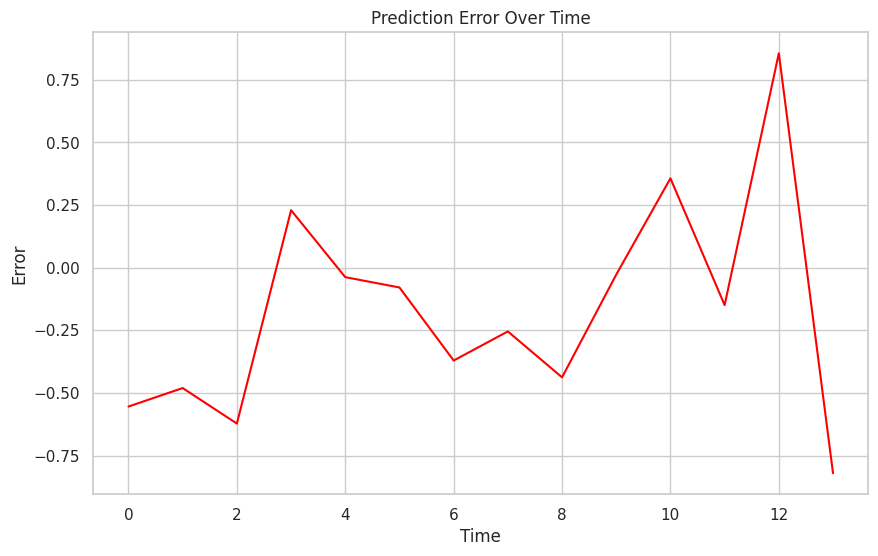

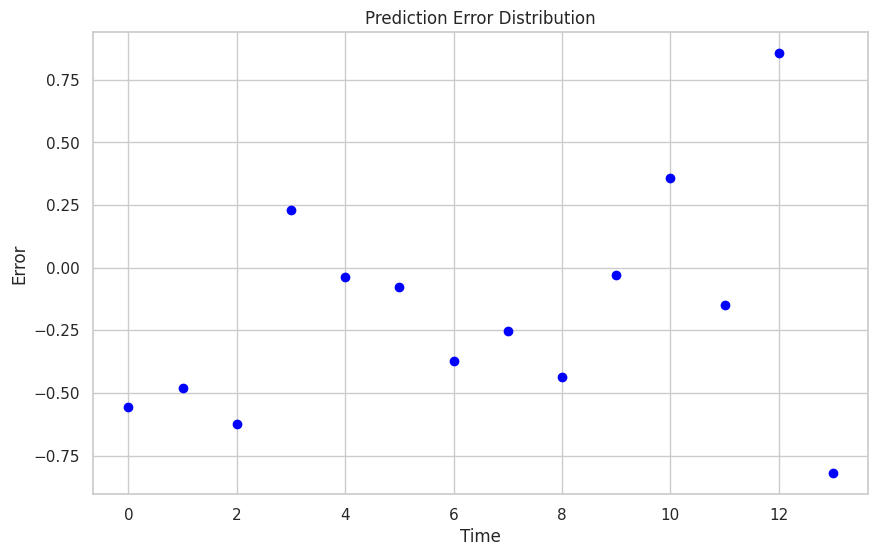

In [44]:
import matplotlib.pyplot as plt

# Line plot of the error over time
plt.figure(figsize=(10, 6))
plt.plot(error, color='red')
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

# Scatter plot of the error
plt.figure(figsize=(10, 6))
plt.scatter(range(len(error)), error, color='blue')
plt.title('Prediction Error Distribution')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()